### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 4.5 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('lungs')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Oryctolagus cuniculus,Lung,8.0,False,CHEMBL613449,[],TISSUE,9986.0
1,[],Mus musculus,Lung,8.0,False,CHEMBL613581,[],TISSUE,10090.0
2,[],Rattus norvegicus,Lung,8.0,False,CHEMBL613643,[],TISSUE,10116.0
3,[],Homo sapiens,Acidic mammalian chitinase,7.0,False,CHEMBL1293197,"[{'accession': 'Q9BZP6', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Protein GPR107,7.0,False,CHEMBL4630835,"[{'accession': 'Q5VW38', 'component_descriptio...",SINGLE PROTEIN,9606.0
5,"[{'xref_id': 'P04075', 'xref_name': None, 'xre...",Homo sapiens,Fructose-bisphosphate aldolase A,6.0,False,CHEMBL2106,"[{'accession': 'P04075', 'component_descriptio...",SINGLE PROTEIN,9606.0
6,"[{'xref_id': 'Q12794', 'xref_name': None, 'xre...",Homo sapiens,Hyaluronidase-1,6.0,False,CHEMBL4528,"[{'accession': 'Q12794', 'component_descriptio...",SINGLE PROTEIN,9606.0
7,[],Homo sapiens,Pulmonary surfactant-associated protein D,6.0,False,CHEMBL2176857,"[{'accession': 'P35247', 'component_descriptio...",SINGLE PROTEIN,9606.0
8,[],Homo sapiens,Lung cancer cell line,5.0,False,CHEMBL614790,[],CELL-LINE,9606.0
9,[],None,Lung cancer cell line,5.0,False,CHEMBL614103,[],CELL-LINE,NaN


In [5]:
# selected_target1 = target_result.target_chembl_id[3]
selected_target1 = 'CHEMBL614088'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,184585,[],CHEMBL714170,Inhibitory activity against Murine Lewis lung ...,F,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Lewis lung carcinoma cell line,10090,None,None,IC50,nM,UO_0000065,None,12.0
1,None,184595,[],CHEMBL714170,Inhibitory activity against Murine Lewis lung ...,F,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Lewis lung carcinoma cell line,10090,None,None,IC50,nM,UO_0000065,None,151.0
2,None,186124,[],CHEMBL714170,Inhibitory activity against Murine Lewis lung ...,F,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Lewis lung carcinoma cell line,10090,None,None,IC50,nM,UO_0000065,None,44.0


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

334

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        1
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0     12.0
1    151.0
2     44.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
if df1_selected['canonical_smiles'].isnull().sum() > 0:
  df1_selected = df1_selected.dropna(axis=0)

In [19]:
len(df1_selected)

334

In [20]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [21]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [22]:
df1_selected.describe()

,standard_value
count,334.000000
mean,12535.759459
std,49519.072064
min,0.300000
25%,32.250000
50%,1476.500000
75%,9389.500000
max,810100.000000


In [23]:
df1_selected['standard_value'] = norm_val(df1_selected)

<ipython-input-23-1651fe78b754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = norm_val(df1_selected)


In [24]:
df1_selected['standard_value'] = convert_log(df1_selected)

<ipython-input-21-31a96a23224e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
<ipython-input-24-dc51576c3f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = convert_log(df1_selected)


In [25]:
df1_selected['standard_value'].head()

0    8.091974
1    6.821023
2    7.356547
3    8.070844
4    6.387216
Name: standard_value, dtype: float64

In [26]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [27]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Creating labels and features

In [28]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [29]:
len(df1_x),len(df1_y)

(334, 334)

In [30]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('lungs_labels.csv',index=False)

### A quick look at files

In [31]:
! ls

lungs_labels.csv  molecule.smi	sample_data


In [32]:
! cat molecule.smi | head -5

CN(CCCNC(=O)c1cc(Cl)cc2nc3ccccc3nc12)CCCNC(=O)c1cc(Cl)cc2nc3ccccc3nc12	CHEMBL29453
CN(CCCNC(=O)c1cccc2nc3c(Cl)cccc3nc12)CCCNC(=O)c1cccc2nc3c(Cl)cccc3nc12	CHEMBL30189
CN(CCCNC(=O)c1cccc2nc3ccc(Cl)cc3nc12)CCCNC(=O)c1cccc2nc3ccc(Cl)cc3nc12	CHEMBL26582
CN(CCCNC(=O)c1cccc2nc3ccc4ccccc4c3nc12)CCCNC(=O)c1cccc2nc3ccc4ccccc4c3nc12	CHEMBL265239
CN(CCCNC(=O)c1cccc2nc3c(ccc4ccccc43)nc12)CCCNC(=O)c1cccc2nc3c(ccc4ccccc43)nc12	CHEMBL30072


### Using padel Descriptor to break it into dataset form

In [33]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-10 12:43:55--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-10 12:43:55--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   143MB/s    in 0.2s    

2023-03-10 12:43:56 (143 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-10 12:43:56--  https://github

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! bash padel.sh

Processing CHEMBL29453 in molecule.smi (1/334). 
Processing CHEMBL30189 in molecule.smi (2/334). 
Processing CHEMBL265239 in molecule.smi (4/334). Average speed: 3.18 s/mol.
Processing CHEMBL26582 in molecule.smi (3/334). Average speed: 6.26 s/mol.
Processing CHEMBL30072 in molecule.smi (5/334). Average speed: 4.70 s/mol.
Processing CHEMBL281681 in molecule.smi (6/334). Average speed: 2.86 s/mol.
Processing CHEMBL285371 in molecule.smi (7/334). Average speed: 2.57 s/mol.
Processing CHEMBL26583 in molecule.smi (8/334). Average speed: 2.17 s/mol.
Processing CHEMBL281482 in molecule.smi (9/334). Average speed: 2.03 s/mol.
Processing CHEMBL286410 in molecule.smi (10/334). Average speed: 1.82 s/mol.
Processing CHEMBL26692 in molecule.smi (11/334). Average speed: 1.74 s/mol.
Processing CHEMBL281020 in molecule.smi (12/334). Average speed: 1.60 s/mol.
Processing CHEMBL281483 in molecule.smi (13/334). Average speed: 1.54 s/mol.
Processing CHEMBL29452 in molecule.smi (14/334). Average speed: 1.

### Model selection and usage

### Importing Modules

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [37]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('lungs_labels.csv')

In [38]:
len(X),len(Y)

(334, 334)

In [39]:
Y['standard_value'].isnull().sum()

0

In [40]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [41]:
Y.standard_value.unique()

array([8.09, 6.82, 7.36, 8.07, 6.39, 5.08, 6.51, 6.97, 8.13, 7.08, 7.14,
       8.28, 7.59, 8.16, 7.62, 5.88, 8.14, 8.8 , 7.19, 8.2 , 6.52, 5.53,
       5.54, 5.73, 4.98, 5.46, 4.62, 7.39, 7.64, 7.27, 8.62, 7.6 , 7.18,
       8.39, 7.05, 8.08, 8.1 , 9.47, 8.92, 8.41, 4.9 , 9.34, 6.95, 6.54,
       5.82, 9.52, 8.25, 8.55, 8.31, 7.51, 8.48, 7.  , 8.11, 4.64, 4.54,
       4.96, 5.44, 8.3 , 5.96, 5.  , 5.03, 8.34, 8.32, 5.3 , 8.77, 6.72,
       7.3 , 7.82, 6.79, 6.74, 8.36, 6.77, 6.14, 7.17, 7.25, 6.05, 8.74,
       5.61, 6.49, 5.99, 7.57, 5.68, 7.01, 5.85, 6.08, 8.17, 8.85, 7.38,
       6.17, 6.89, 5.75, 7.74, 6.91, 6.28, 6.32, 7.89, 5.97, 5.62, 6.7 ,
       6.33, 6.11, 6.21, 5.98, 7.49, 4.68, 4.55, 5.31, 5.28, 4.39, 8.64,
       8.27, 8.24, 8.19, 8.05, 7.88, 7.77, 6.23, 6.29, 4.85, 3.7 , 6.68,
       6.76, 4.61, 5.32, 5.21, 4.86, 4.76, 4.82, 4.81, 4.88, 4.53, 4.29,
       5.36, 4.91, 4.78, 4.66, 4.42, 4.34, 5.47, 4.84, 5.87, 5.42, 5.01,
       4.75, 4.74, 4.5 , 4.27, 4.44, 4.05, 4.25, 4.

In [42]:
Y.describe()

,standard_value
count,334.000000
mean,6.634820
std,1.485572
min,3.090000
25%,5.212500
50%,6.740000
75%,8.090000
max,9.520000


In [43]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [44]:
X.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y[:5]

array([8.09, 6.82, 7.36, 8.07, 6.39])

In [46]:
X.shape

(334, 881)

### Defining all the Regressors

In [47]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [48]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [49]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.07653674539854005

Mean Sqaured Error : 2.1961926962517855

Mean Absolute Error : 1.1402274356033686

Root Mean Squared : 1.4819556998276924


### Decision Tree Regressor

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.10555521306756077

Mean Sqaured Error : 2.6292462338308455

Mean Absolute Error : 1.1565721393034827

Root Mean Squared : 1.6214950613032546


### Support Vector Regressor

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.10964637311772851

Mean Sqaured Error : 2.117450935591391

Mean Absolute Error : 1.1369271612405032

Root Mean Squared : 1.4551463622575533


### Extra Tree Regression

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.08253005176013373

Mean Sqaured Error : 2.5744874864292346

Mean Absolute Error : 1.155785497512439

Root Mean Squared : 1.6045209523185524


### Lasso Regression

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.010276102726274994

Mean Sqaured Error : 2.402652175871055

Mean Absolute Error : 1.4491178936776792

Root Mean Squared : 1.5500490882133555


### Ridge Regression

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.1316981524201284

Mean Sqaured Error : 2.691419722790556

Mean Absolute Error : 1.289692940880627

Root Mean Squared : 1.640554699725235


### Orthogonal Matching Pursuit Regressor

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.46000883833431194

Mean Sqaured Error : 3.472212598861539

Mean Absolute Error : 1.4235110287553112

Root Mean Squared : 1.8633873990293963


### Linear Regression

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -3.4390535729059994e+23

Mean Sqaured Error : 8.178803326716388e+23

Mean Absolute Error : 400625580077.9846

Root Mean Squared : 904367365992.1829


### Model Performance

In [58]:
import seaborn as sns

In [59]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [60]:
model_performance = pd.DataFrame.from_dict(di)

In [61]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,1.481956e+00,7.653675e-02
1,Decision Tree,1.621495e+00,-1.055552e-01
2,Support Vector,1.455146e+00,1.096464e-01
3,Extra Tree,1.604521e+00,-8.253005e-02
4,Lasso,1.550049e+00,-1.027610e-02
5,Ridge,1.640555e+00,-1.316982e-01
6,Orthogonal,1.863387e+00,-4.600088e-01
7,Linear,9.043674e+11,-3.439054e+23


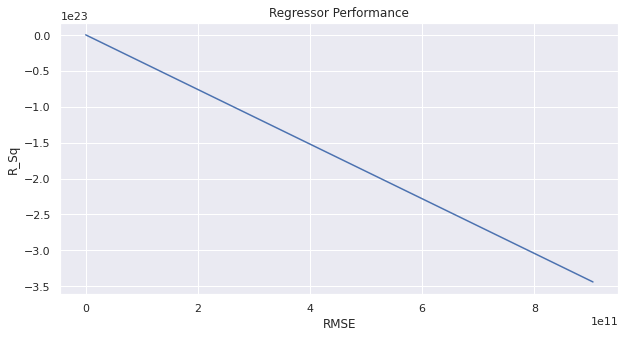

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [64]:
rmse

1.4643073253491048

### Saving model state for later use

In [65]:
import pickle

pickle.dump(rfe,open("lungs_model.pkl","wb"))